In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import os

from tqdm import tqdm


import torchvision
from torchvision import transforms
from torch.utils.data import Subset, Dataset, DataLoader

/home/s.gostilovich/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Main setup

In [3]:
device = 'cuda:2' #torch.device(torch.cuda.get_device_name(1))

In [24]:
MODEL_TYPE = 'AE'
# MODEL_TYPE = 'VAE'
DATASET_TYPE = 'CelebA'
# DATASET_TYPE = 'CIFAR10'


# Upload the model
# # model_dir = 'evaluation'
model_dir = 'test_2_save'
# # model_dir = ''

# # model_name = 'MNIST__VAE_128__50__10ktrain'
model_name = f'test2__{DATASET_TYPE}__{MODEL_TYPE}__512__0.01__100__end'
# model_name = f'test1__{DATASET_TYPE}__{MODEL_TYPE}__128__0.01__149__end'
# # model_name = 'test1__MNIST__LRAE__128__0.01__10'






GOOD_MODEL_TYPE = ['VAE', 'AE', 'LRAE']
GOOD_DATASET_TYPE = ['MNIST', 'CIFAR10', 'CelebA', 'CELEBA']
assert MODEL_TYPE in GOOD_MODEL_TYPE, f"Error, bad model type, select from: {GOOD_MODEL_TYPE}"
assert DATASET_TYPE in GOOD_DATASET_TYPE, f"Error, bad dataset type, select from: {GOOD_DATASET_TYPE}"

# Dataset

In [25]:
# selecting dataset
print(DATASET_TYPE)
if DATASET_TYPE in ['MNIST']:
    train_ds = torchvision.datasets.MNIST('./files/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize(32),
                                    torchvision.transforms.ToTensor(),
                                ]))
    test_ds = torchvision.datasets.MNIST('./files/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize(32),
                                    torchvision.transforms.ToTensor(),
                                ]))
    ds_train_size, df_test_size = 60000, 10000
    ds_in_channels = 1
    
    
elif DATASET_TYPE in ['CIFAR10']:
    train_ds = torchvision.datasets.CIFAR10('./files/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize(32),
                                    torchvision.transforms.ToTensor(),
                                ]))
    test_ds = torchvision.datasets.CIFAR10('./files/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize(32),
                                    torchvision.transforms.ToTensor(),
                                ]))
    ds_train_size, df_test_size = 50000, 10000
    ds_in_channels = 3
    
elif DATASET_TYPE in ['CelebA', 'CELEBA']:
    train_ds = torchvision.datasets.CelebA('./files/', split='train', target_type ='attr', download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize([64,64]),
                                    torchvision.transforms.ToTensor(),
                                ]))
    test_ds = torchvision.datasets.CelebA('./files/', split='test', target_type ='attr', download=True,
                                transform=torchvision.transforms.Compose([
                                    transforms.Resize([64,64]),
                                    torchvision.transforms.ToTensor(),
                                ]))
    ds_train_size, df_test_size = 162770, 19867  # validate_size = 19962
    ds_in_channels = 3
    
else:
    assert False, f"Error, bad dataset type, select from: {GOOD_DATASET_TYPE}"


CelebA
Files already downloaded and verified
Files already downloaded and verified


In [26]:
num_workers = 10

# dataset and dataloader
TRAIN_SIZE = ds_train_size 
TEST_SIZE = df_test_size


BATCH_SIZE = 32
dl = DataLoader(train_ds, batch_size=BATCH_SIZE,     num_workers=num_workers)
dl_test = DataLoader(test_ds, batch_size=BATCH_SIZE, num_workers=num_workers)

#full dataset train
FULL_TRAIN_SIZE = TRAIN_SIZE
# FULL_TRAIN_SIZE = 1000

dl_full_train = DataLoader(train_ds, batch_size=FULL_TRAIN_SIZE, num_workers=num_workers)
for x, y in dl_full_train:
    X_full_train = x
    targets = y
    break

#full dataset train
FULL_TEST_SIZE =  TEST_SIZE
# FULL_TEST_SIZE =  1000
dl_full_test = DataLoader(test_ds, batch_size=FULL_TEST_SIZE, num_workers=num_workers)
for x, y in dl_full_test:
    X_full_test = x
    targets_test = y
    break


print(f"{DATASET_TYPE} dataset logs:")
print(X_full_test.shape)
print(torch.max(X_full_test))
print(targets_test.unique(return_counts=True))

CelebA dataset logs:
torch.Size([19867, 3, 64, 64])
tensor(1.)
(tensor([0, 1]), tensor([610960, 183720]))


In [1]:
from models.R1AE import ConvLRAE, ConvVAE, ConvAE
# from models.R1AE_CelebA import ConvLRAE, ConvVAE, ConvAE




/home/s.gostilovich/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# PARAMETERS
# IN_FEATURES = 256*2*2
IN_FEATURES = 1024*4*4
# IN_FEATURES = 1024*2*2

OUT_FEATURES = 512
# OUT_FEATURES = 128

N_BINS = 20
GRID = torch.arange(1,N_BINS+1).to(device)/N_BINS

# nonlinearity = 

DROPOUT = 0.0
TEMP = 0.5
SAMPLING = 'gumbell'



NameError: name 'torch' is not defined

In [9]:
import torch
import torch.nn as nn
ds_in_channels = 1
device = "cuda:1"

In [10]:
MODEL_TYPE = 'VAE'
if MODEL_TYPE == 'LRAE':
     model = ConvLRAE(IN_FEATURES, OUT_FEATURES, N_BINS, GRID, dropout=DROPOUT, nonlinearity=nn.ReLU(),
                sampling=SAMPLING, temperature=TEMP, in_channels=ds_in_channels).to(device)
elif MODEL_TYPE == 'VAE':
    model = ConvVAE(IN_FEATURES, OUT_FEATURES, nonlinearity=nn.ReLU(), in_channels=ds_in_channels).to(device)
elif MODEL_TYPE == 'AE':
    model = ConvAE(IN_FEATURES, OUT_FEATURES, nonlinearity=nn.ReLU(), in_channels=ds_in_channels).to(device)
else:
    assert False, f"Error, bad model type, select from: {GOOD_MODEL_TYPE}"
    
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
print(f"{MODEL_TYPE} was inisialized")

VAE was inisialized


In [51]:
# # Upload the model
# model_name = "test2__CelebA__LRAE__512__0.01__99__end"
model_name = f'test2__{DATASET_TYPE}__{MODEL_TYPE}__512__0.01__199__end'

# model_dir = 'test_1_save'
# model_dir = ''
model_path = os.path.join(model_dir, model_name + '.pth')

In [52]:
## Loading
# PATH = "MNIST__gumbell__entropy__200"
# PATH = "MNIST__VAE__8__25"
PATH = model_path

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
loss_list_train = checkpoint['loss_list_train']
loss_list_test = checkpoint['loss_list_test']

# Evaluation

In [53]:
from models.evaluation import inf_by_layers, check_reconstruction, gen_idx_for_batches, display_datasets
from models.evaluation import gen_gm_dataset, update_FID_class, ManualFID, prepare_to_FID, get_inf_by_layers
from torchmetrics.image.fid import FrechetInceptionDistance as tm_FrechetInceptionDistance
from torcheval.metrics import FrechetInceptionDistance

from sklearn.mixture import GaussianMixture

### Loss function

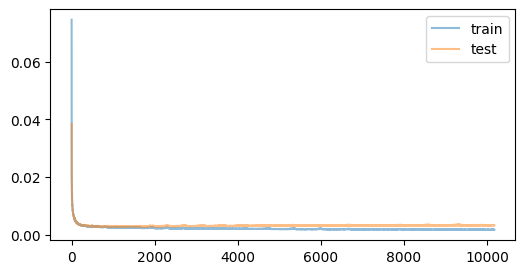

In [54]:
plt.figure(figsize=(6,3))
plt.plot(loss_list_train, alpha=0.5, label='train')
plt.plot(loss_list_test, alpha=0.5, label='test')
# plt.yscale('log')
plt.legend()
plt.savefig(f'MNIST_{model_name}_loss.png')
plt.show()

## Calculation

In [55]:
# forward whole dataset
with torch.no_grad():
    model.eval()    
    decoded_2d1, encoded_out_dim1, factors_probability1 = get_inf_by_layers(model, X_full_train, batch_size=4*1024, device=device)    
    decoded_2d2, encoded_out_dim2, factors_probability2 = get_inf_by_layers(model, X_full_test,  batch_size=2*1024, device=device)

4096 x 39 + 3026 == 162770(163840)


100%|██████████| 40/40 [00:18<00:00,  2.19it/s]


2048 x 9 + 1435 == 19867(20480)


100%|██████████| 10/10 [00:02<00:00,  4.41it/s]


## Reconstruction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


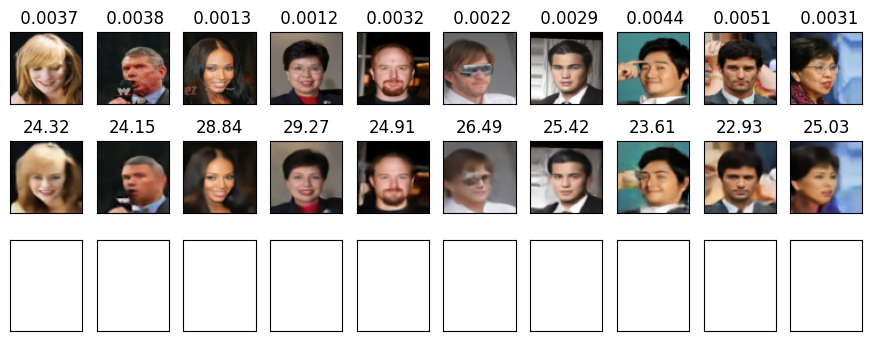

In [56]:
# Check reconstruction
check_reconstruction(model, test_ds, device)
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


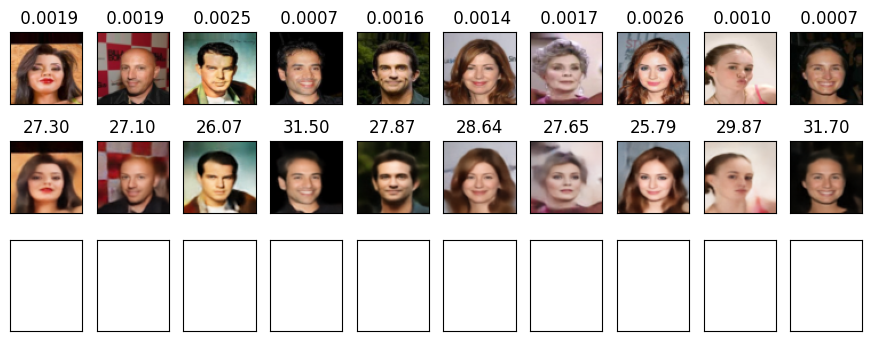

In [61]:
# Check reconstruction
check_reconstruction(model, train_ds, device, fakeseed=47)
# plt.show()

In [62]:
## Calculate reconstruction
# MSE
mse_train = torch.nn.MSELoss()(decoded_2d1.cpu().detach(), X_full_train.cpu().detach())
mse_test = torch.nn.MSELoss()(decoded_2d2.cpu().detach(), X_full_test.cpu().detach())
print(f"MSE: {mse_test.item():.4f}({mse_train.item():.4f})")

# PSNR
psnr_train = 10*torch.log10(1 / (mse_train + 1e-20))
psnr_test = 10*torch.log10(1 / (mse_test + 1e-20))

print(f"PSNR: {psnr_test.item():.2f}({psnr_train.item():.2f})")

MSE: 0.0033(0.0021)
PSNR: 24.82(26.85)


In [63]:
## FID reconstruction train and test
# test
imgs_real_r = X_full_test
torch.cuda.empty_cache()
r_fid = ManualFID(device=device)
r_fid.update_full(imgs_real_r, True, batch_size=512, transform=prepare_to_FID)
# del imgs_real_r


imgs_fake_r = decoded_2d2
r_fid.clear_part(is_real=False)
r_fid.update_full(imgs_fake_r, False, batch_size=512, transform=prepare_to_FID)
r_fid_value = r_fid.compute()
print("Test reconstruction fid:", r_fid_value, '\n')
# del imgs_fake_r
print(f"Rec FID: {r_fid_value :.2f}")



Using cache found in /home/s.gostilovich/.cache/torch/hub/pytorch_vision_v0.10.0
/home/s.gostilovich/.venv/lib64/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/s.gostilovich/.venv/lib64/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512 x 38 + 411 == 19867(19968)


100%|██████████| 39/39 [00:20<00:00,  1.87it/s]


Real is done!
Fake was cleared!
512 x 38 + 411 == 19867(19968)


100%|██████████| 39/39 [00:24<00:00,  1.61it/s]


Fake is done!
Test reconstruction fid: tensor(19.6941) 

Rec FID: 19.69


In [64]:
del r_fid

In [65]:
# FID reconstruction train and test
# train
imgs_real_r_train = X_full_train
torch.cuda.empty_cache()
r_fid_train = ManualFID(device=device)
r_fid_train.update_full(imgs_real_r_train, True, batch_size=512)
del imgs_real_r_train

imgs_fake_r_train = decoded_2d1
r_fid_train.clear_part(is_real=False)
r_fid_train.update_full(imgs_fake_r_train, False, batch_size=512)
r_fid_value_train = r_fid_train.compute()
print("Test reconstruction fid:", r_fid_value_train, '\n')
del imgs_fake_r_train

print(f"Rec FID train: {r_fid_value_train :.2f}")

Using cache found in /home/s.gostilovich/.cache/torch/hub/pytorch_vision_v0.10.0


512 x 317 + 466 == 162770(162816)


100%|██████████| 318/318 [03:33<00:00,  1.49it/s]


Real is done!
Fake was cleared!
512 x 317 + 466 == 162770(162816)


100%|██████████| 318/318 [02:49<00:00,  1.88it/s]


Fake is done!
Test reconstruction fid: tensor(17.0371) 

Rec FID train: 17.04


In [34]:
f"Rec FID: {r_fid_value:.2f}({r_fid_value_train:.2f})"

'Rec FID: 21.67(19.35)'

In [35]:
del r_fid
# del r_fid_train

In [22]:
# del imgs_real_r_train, imgs_fake_r_train,  imgs_real_r, imgs_fake_r
# del imgs_real_r, imgs_fake_r
# del r_fid_train, r_fid


In [36]:
torch.cuda.empty_cache()

# Generation

In [42]:

device_fid = 'cuda:1'
model = model.to(device)
# EMB_SIZE = 128

In [43]:
# Setup generating

dataset_list = []
dataset_names = []
ground_truth = X_full_train.detach().cpu()
# N_samples = ground_truth.shape[0]
N_samples = 50000
print("N_samples =", N_samples)

N_samples = 50000


In [44]:
# Generating samples Truth
dataset_truth = ground_truth # full dataset
dataset_list +=[dataset_truth]
dataset_names += ['Truth']
print(f"{dataset_names[-1]} samples = ", dataset_list[-1].shape[0])

Truth samples =  162770


In [45]:
# Generating samples from autoencoders
model_dataset = gen_gm_dataset(model, encoded_out_dim1, device, n_components=1, total_size=50000, batch_size=1024, C_H_W = [1024, 4, 4], max_iter=500)
dataset_list +=[model_dataset]
dataset_names += [MODEL_TYPE + '_gm1']

print(f"{dataset_names[-1]} samples = ", dataset_list[-1].shape[0])


1024 x 48 + 848 == 50000(50176)


100%|██████████| 49/49 [00:11<00:00,  4.21it/s]


AE_gm1 samples =  50000


In [46]:
# Generating samples from autoencoders
model_dataset = gen_gm_dataset(model, encoded_out_dim1, device, n_components=4, total_size=50000, batch_size=1024, C_H_W = [1024, 4, 4], max_iter=500)
dataset_list +=[model_dataset]
dataset_names += [MODEL_TYPE + '_gm4']

print(f"{dataset_names[-1]} samples = ", dataset_list[-1].shape[0])

1024 x 48 + 848 == 50000(50176)


100%|██████████| 49/49 [00:29<00:00,  1.65it/s]


AE_gm4 samples =  50000


#### display 

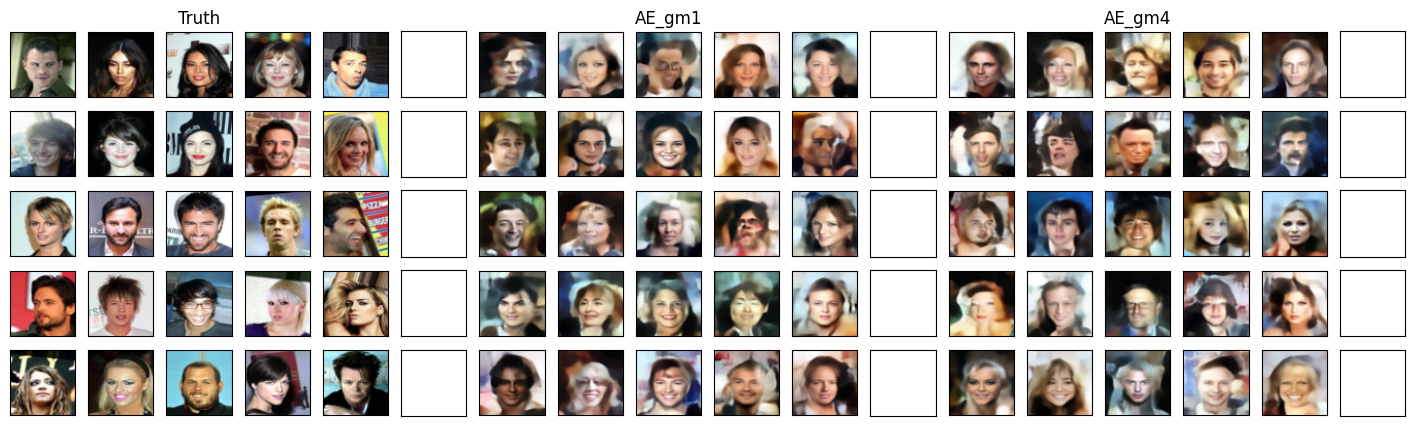

In [47]:
display_datasets(dataset_list, dataset_names)

#### FID calculation

In [48]:
# imgs_real, imgs_fake, imgs_fake_gm4 = prepare_to_FID(dataset_list[0]), prepare_to_FID(dataset_list[1]), prepare_to_FID(dataset_list[2])
# imgs_fake, imgs_fake_gm4 = prepare_to_FID(dataset_list[1]), prepare_to_FID(dataset_list[2])

In [49]:
# FID 2
torch.cuda.empty_cache()
try:
    m_fid = r_fid_train
    print("m_fid <--- r_fid_train ")
    m_fid.to(device_fid)
    
    
except:
    print("Init m_fid")
    imgs_real = prepare_to_FID(dataset_list[0])
    m_fid = ManualFID(device=device_fid)
    m_fid.update_full(imgs_real, True, batch_size=512)
    del imgs_real
        

imgs_fake = prepare_to_FID(dataset_list[1])
m_fid.clear_part(is_real=False)
m_fid.update_full(imgs_fake, False, batch_size=512)
m_fid_value = m_fid.compute()
print("fake:", m_fid_value, '\n')
del imgs_fake

imgs_fake_gm4 = prepare_to_FID(dataset_list[2])
m_fid.clear_part(is_real=False)
m_fid.update_full(imgs_fake_gm4, False, batch_size=512)
m_fid_value_gm4 = m_fid.compute()
print("fake gm4:", m_fid_value_gm4)
del imgs_fake_gm4

m_fid <--- r_fid_train 
Fake was cleared!
512 x 97 + 336 == 50000(50176)


100%|██████████| 98/98 [01:26<00:00,  1.13it/s]


Fake is done!
fake: tensor(52.0445) 

Fake was cleared!
512 x 97 + 336 == 50000(50176)


100%|██████████| 98/98 [00:56<00:00,  1.73it/s]


Fake is done!
fake gm4: tensor(45.6559)


In [50]:

print(f"FID gm1: {m_fid_value.item() :.2f} FID gm4: {m_fid_value_gm4.item() :.2f}")
# print(f"FID gm1: {auto_fid.item() :.2f} ({m_fid_value.item() :.2f}); FID gm4: {auto_fid_gm4.item() :.2f} ({m_fid_value_gm4.item() :.2f});")

FID gm1: 52.04 FID gm4: 45.66


In [27]:
del m_fid

In [50]:
# del imgs_real, imgs_fake, imgs_fake_gm4 

In [ ]:
# ## FID 1
# #fake
# fid = FrechetInceptionDistance(device=device_fid)
# torch.cuda.empty_cache()
# fid.reset()
# torch.cuda.empty_cache()
# update_FID_class(fid, imgs_real, True, batch_size=512)
# # print(fid.compute().detach().cpu())
# update_FID_class(fid, imgs_fake, False, batch_size=512)
# auto_fid = fid.compute().detach().cpu()
# print("fake:", auto_fid, '\n')


# #fake gm4
# fid = FrechetInceptionDistance(device=device_fid)
# torch.cuda.empty_cache()
# fid.reset()
# torch.cuda.empty_cache()
# update_FID_class(fid, imgs_real, True, batch_size=512)
# # print(fid.compute().detach().cpu())
# update_FID_class(fid, imgs_fake_gm4, False, batch_size=512)
# auto_fid_gm4 = fid.compute().detach().cpu()
# print("fake gm4:", auto_fid_gm4)

512 x 117 + 96 == 60000(60416)


100%|██████████| 118/118 [01:29<00:00,  1.32it/s]


512 x 97 + 336 == 50000(50176)


100%|██████████| 98/98 [01:15<00:00,  1.29it/s]


fake: tensor(25.5670) 

512 x 117 + 96 == 60000(60416)


100%|██████████| 118/118 [01:29<00:00,  1.32it/s]


512 x 97 + 336 == 50000(50176)


100%|██████████| 98/98 [01:13<00:00,  1.33it/s]


fake gm4: tensor(17.7235)


In [ ]:
# # FID 3
# tm_fid = tm_FrechetInceptionDistance(normalize=True, reset_real_features=True)
# torch.cuda.empty_cache()
# tm_fid.to(device_fid)
# tm_fid.reset()
# torch.cuda.empty_cache()
# update_FID_class(tm_fid, imgs_real[:1000], True, batch_size=512)
# # print(fid.compute().detach().cpu())
# update_FID_class(tm_fid, imgs_fake[:1000], False, batch_size=512)
# auto_tm_fid = tm_fid.compute().detach().cpu()
# auto_tm_fid


# Visualization (PCA and tNSE)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

enc_pca = pca.fit_transform(encoded_out_dim1.cpu().detach().numpy())
enc_pca1 = pca.fit_transform(encoded_out_dim2.cpu().detach().numpy())

enc_tsne = tsne.fit_transform(encoded_out_dim1.cpu().detach().numpy())
enc_tsne1 = tsne.fit_transform(encoded_out_dim2.cpu().detach().numpy())

# enc_pca = enc.detach().numpy()
# enc_pca1 = enc1.detach().numpy()

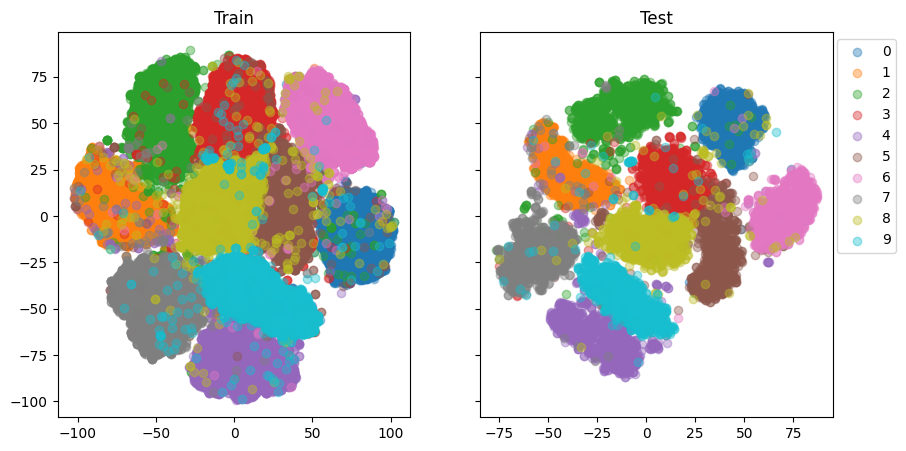

In [ ]:
# TSNE
fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)
for cls in [0,1,2,3,4,5,6,7,8,9]:
    # X_cur = enc.cpu().detach().numpy()[targets == cls]
    X_cur = enc_tsne[targets == cls]
    axs[0].scatter(X_cur[::,0], X_cur[::,1], label=cls, alpha=0.4)
    
    # X_cur1 = enc1.cpu().detach().numpy()[targets_test == cls]
    X_cur1 = enc_tsne1[targets_test == cls]
    axs[1].scatter(X_cur1[::,0], X_cur1[::,1], label=cls, alpha=0.4)

axs[0].set_title('Train')
axs[1].set_title('Test')
plt.legend(bbox_to_anchor=(1.2, 1))
# plt.xlim(-0.1,1.1)
# plt.ylim(-0.1,1.1)
plt.savefig('MNIST_softmax_plus_PCA.png')
plt.show()

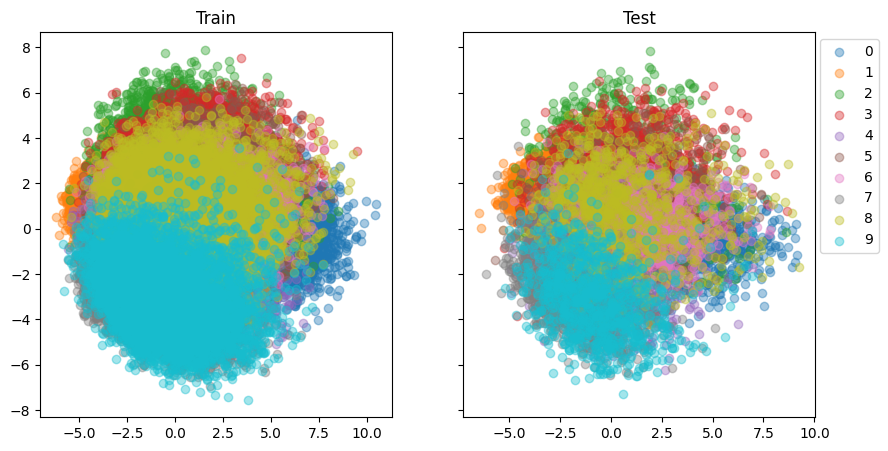

In [ ]:
# PCA
fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)
for cls in [0,1,2,3,4,5,6,7,8,9]:
    # X_cur = enc.cpu().detach().numpy()[targets == cls]
    X_cur = enc_pca[targets == cls]
    axs[0].scatter(X_cur[::,0], X_cur[::,1], label=cls, alpha=0.4)
    
    # X_cur1 = enc1.cpu().detach().numpy()[targets_test == cls]
    X_cur1 = enc_pca1[targets_test == cls]
    axs[1].scatter(X_cur1[::,0], X_cur1[::,1], label=cls, alpha=0.4)

axs[0].set_title('Train')
axs[1].set_title('Test')
plt.legend(bbox_to_anchor=(1.2, 1))
# plt.xlim(-0.1,1.1)
# plt.ylim(-0.1,1.1)
plt.savefig('MNIST_softmax_plus_PCA.png')
plt.show()

In [ ]:
EMB_SIZE = 8

In [ ]:
EMB_SIZE = 128
PCA_SIZE = 4
pca = PCA(n_components=PCA_SIZE)
pca.fit(encoded_out_dim1.cpu().detach().numpy())
pca.transform(torch.randn(1,EMB_SIZE)*torch.std(encoded_out_dim1, dim=0).cpu()
               + torch.mean(encoded_out_dim1, dim=0).cpu())

array([[ 1.3379141 ,  0.68616609, -1.60630445,  0.44231961]])

In [ ]:
enc_pca = pca.transform(encoded_out_dim1.cpu().detach().numpy())
mean_enc_pca = np.mean(enc_pca, axis=0)
std_enc_pca = np.std(enc_pca, axis=0)
print(mean_enc_pca)
print(std_enc_pca)

[ 8.3830355e-07 -4.7270061e-07  3.4983555e-07  2.3694882e-07]
[2.9085057 2.6375263 2.5572107 2.49722  ]


In [ ]:
rand = np.random.randn(B, PCA_SIZE)*std_enc_pca + mean_enc_pca
rand = pca.inverse_transform(rand)

rand = torch.as_tensor(rand, dtype=torch.float32)

C, H, W = 128, 4, 4
decoded_inter_dim =         model.low_rank.intermediate_decoder(rand.to(device))
decoded_1d =                model.low_rank.decoder(decoded_inter_dim)
decoded_2d_small = decoded_1d.view(B, C, H, W)
decoded_2d = model.up(decoded_2d_small)

model_dataset = decoded_2d.detach().cpu()
# model_dataset = model_dataset*(model_dataset > 0)
dataset_list +=[model_dataset]
dataset_names += ['VAE_pca']

In [ ]:
rand.shape

(60000, 128)

## Interpolation

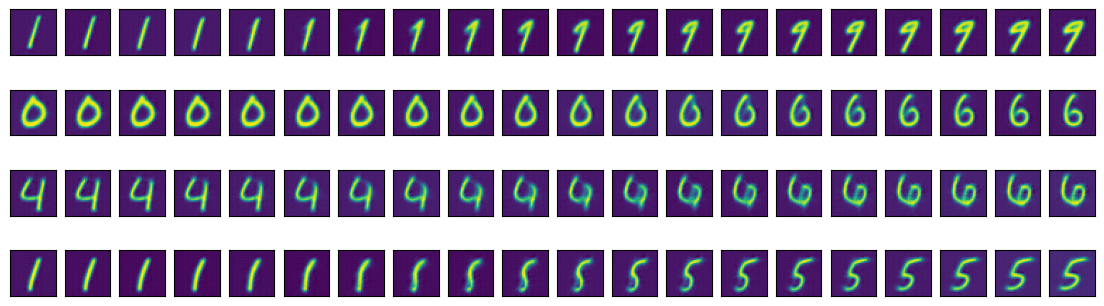

In [ ]:
# plot
EMB_SIZE = 8

fig, axs = plt.subplots(4,20, figsize=(14,4))
for i in range(0,20):
    with torch.no_grad():
        model.eval()
            
        for j in range(4):
            # encode two numbers
            # NUMBER 1
            IDX_1 = j+2
            x_down1 = model.down(X_full_test[IDX_1].unsqueeze(0).to(device))
            B, C, H, W = x_down1.shape
            x_flat1 = x_down1.view(B,C*H*W)
            encoded_inter_dim1 =                    model.low_rank.encoder(x_flat1)
            encoded_out_dim1, factors_probability1 = model.low_rank.low_rank_pants(encoded_inter_dim1)

            # NUMBER 2
            IDX_2 = j+20
            x_down2 = model.down(X_full_test[IDX_2].unsqueeze(0).to(device))
            B, C, H, W = x_down2.shape
            x_flat2 = x_down2.view(B,C*H*W)
            encoded_inter_dim2 =                    model.low_rank.encoder(x_flat2)
            encoded_out_dim2, factors_probability2 = model.low_rank.low_rank_pants(encoded_inter_dim2)

            # decode and plot
            new_encoded = (1-i/axs.shape[-1])*encoded_out_dim1 + (i/axs.shape[-1])*encoded_out_dim2
            decoded_inter_dim =  model.low_rank.intermediate_decoder(new_encoded)
            decoded_1d = model.low_rank.decoder(decoded_inter_dim)
            decoded_2d_small = decoded_1d.view(B, C, H, W)
            decoded_2d = model.up(decoded_2d_small)

            axs[j,i].imshow(decoded_2d.cpu().detach().numpy()[0,0])
            axs[j,i].set_xticks([])
            axs[j,i].set_yticks([])
plt.show()

# Classification test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### from factors_probability 

In [ ]:
with torch.no_grad():
    model.eval()
    # Train
    x_batch = X_full_train.to(device)
    decoded_2d, encoded_out_dim, factors_probability = inf_by_layers(model, x_batch)
    prob_latent_train = factors_probability.reshape(factors_probability.shape[0], -1).detach().cpu()
    
    #Test
    x_batch = X_full_test.to(device)
    decoded_2d, encoded_out_dim, factors_probability = inf_by_layers(model, x_batch)
    prob_latent_test = factors_probability.reshape(factors_probability.shape[0], -1).detach().cpu()
    
    
# for j in range(factors_probability.shape[1]):
#     plt.plot(factors_probability[0, j, :].detach().cpu())

In [ ]:
X_class_train, X_class_test = prob_latent_train, prob_latent_test

In [ ]:
# Low rank
n_components = 20
pca_ = PCA(n_components=prob_latent_train.shape[-1])
pca_.fit(prob_latent_train)
plt.plot(pca_.explained_variance_)
plt.vlines([n_components], ymin = plt.gca().get_ylim()[0], ymax = plt.gca().get_ylim()[1], colors=['r'], linestyles=['--'])

pca_f = PCA(n_components=prob_latent_train.shape[-1]).fit(prob_latent_train)
X_class_train = pca_f.transform(prob_latent_train)
X_class_test= pca_f.transform(prob_latent_test)


#### from encoded_out_dim

In [ ]:
with torch.no_grad():
    model.eval()
    # Train
    x_batch = X_full_train.to(device)
    decoded_2d, encoded_out_dim, factors_probability = inf_by_layers(model, x_batch)
    # prob_latent_train = factors_probability.reshape(factors_probability.shape[0], -1).detach().cpu()
    encoded_out_dim_train = encoded_out_dim.detach().cpu()
    
    #Test
    x_batch = X_full_test.to(device)
    decoded_2d, encoded_out_dim, factors_probability = inf_by_layers(model, x_batch)
    prob_latent_test = factors_probability.reshape(factors_probability.shape[0], -1).detach().cpu()
    encoded_out_dim_test = encoded_out_dim.detach().cpu()
    
   


In [ ]:
X_class_train, X_class_test = encoded_out_dim_train, encoded_out_dim_test

In [ ]:
(encoded_out_dim_train != X_class_train).sum()

#### Classification  

In [ ]:
X_train, y_train = X_class_train, targets
X_test, y_test= X_class_test, targets_test

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


In [ ]:
plt.figure(figsize=[15, 6])
nx, ny = 2, 5
for i in range(10):
    plt.subplot(nx, ny, i+1)
    plt.bar(np.arange(clf.coef_.shape[1])+1, clf.coef_[i, :])
    if i % ny != 0:
        plt.gca().set_yticks([])
        
    # plt.gca().set_yticks([-10, 0, 10])
    plt.gca().set_ylim([-40, 40])
    plt.gca().set_xticks([])
    # plt.grid()
    plt.title(str(i))

In [ ]:
# for i in range(10):
#     plt.scatter(clf.coef_[i, 0], clf.coef_[i, 1],)

In [ ]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

In [ ]:
# plt.figure(figsize=[16, 4])

# # plt.subplot(1, 3, 1)
# plt.figure(figsize=[8, 7])
# cm = confusion_matrix(y_train, y_pred_train, labels=clf.classes_, normalize='all')
# disp = ConfusionMatrixDisplay(confusion_matrix=np.round(cm, 3), display_labels=clf.classes_)
# disp.plot(ax = plt.gca())
# plt.title('Train')
# plt.show()



# plt.subplot(1, 3, 2)
plt.figure(figsize=[8, 7])
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=np.round(cm, 2), display_labels=clf.classes_)
disp.plot(ax = plt.gca())
plt.title('Test')

# Other

#### different


In [ ]:
# Others for CelebA, getting train and tests
with open('list_eval_partition.txt', 'r') as f:
    str_ = f.read()

list_target = []
for line in str_.split('\n'):
    if line != '':
        list_target.append(int(line.split()[-1]))
        
print((torch.as_tensor(list_target) == 0).sum())
print((torch.as_tensor(list_target) == 1).sum())
print((torch.as_tensor(list_target) == 2).sum())

tensor(162770)
tensor(19867)
tensor(19962)


#### Dist grapths

In [ ]:
# forward whole dataset
with torch.no_grad():
    model.eval()
    # mnist
    decoded_2d, encoded_out_dim, factors_probability = inf_by_layers(model, X_full_test.to(device))
    decoded_2d1, encoded_out_dim1, factors_probability1 = inf_by_layers(model, X_full_train.to(device))
    


Text(0.5, 0.98, 'Train')

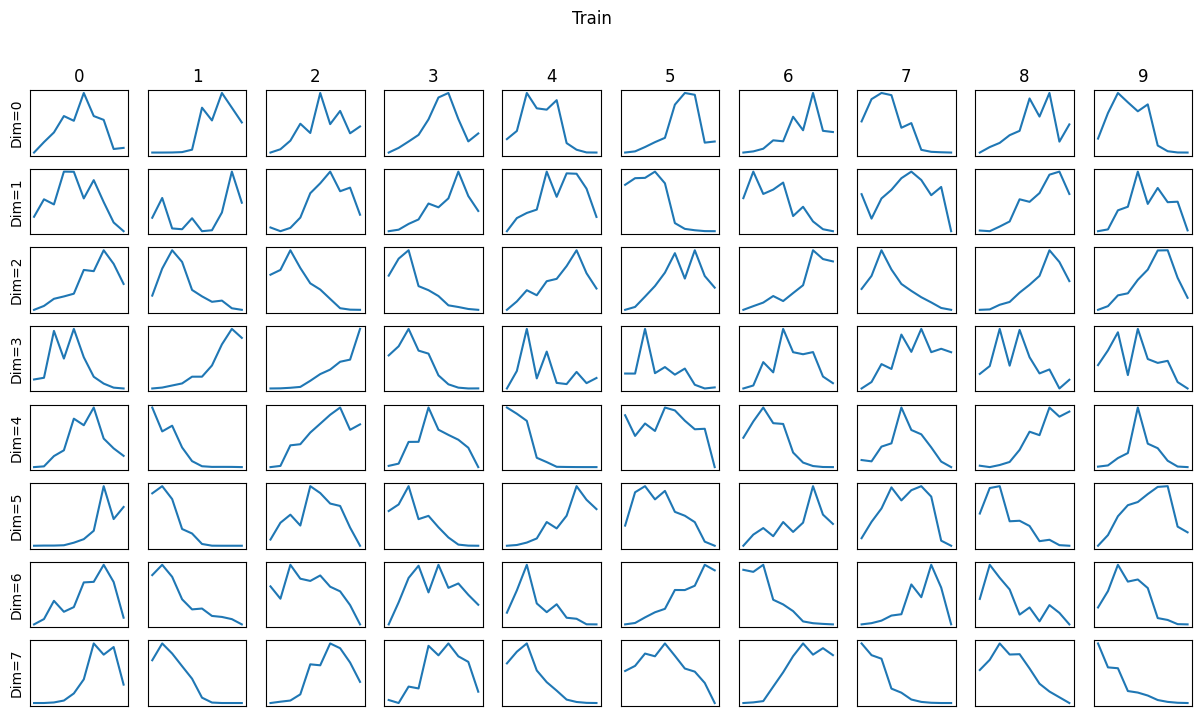

In [ ]:
# check z distribution
dim = 0
ny = 10




dy_dim = 1

nx = 8*dy_dim
plt.figure(figsize=[15, nx])

for dim in range(8):
    for i in range(10):
        plt.subplot(nx, ny, (dim*dy_dim)*ny+ i+1)
        plt.plot(factors_probability1.detach().cpu()[targets==i].mean(0)[dim])
        plt.gca().set_yticks([])
        plt.gca().set_xticks([])
        if dim == 0:
            plt.title(f"{i}")
        if i == 0:
            plt.ylabel(f"Dim={dim}")    
        
    # for i in range(10):
    #     plt.subplot(nx, ny, (dim*dy_dim + 1)*ny+ i+1)
    #     plt.hist(encoded_out_dim1[:, dim].detach().cpu()[targets_test==i], bins=20, density=True)
    #     plt.gca().set_yticks([])
    #     plt.gca().set_xticks([])
    #     # plt.title(f"{i}")
    
plt.suptitle(f"Train")




Text(0.5, 0.98, 'Test')

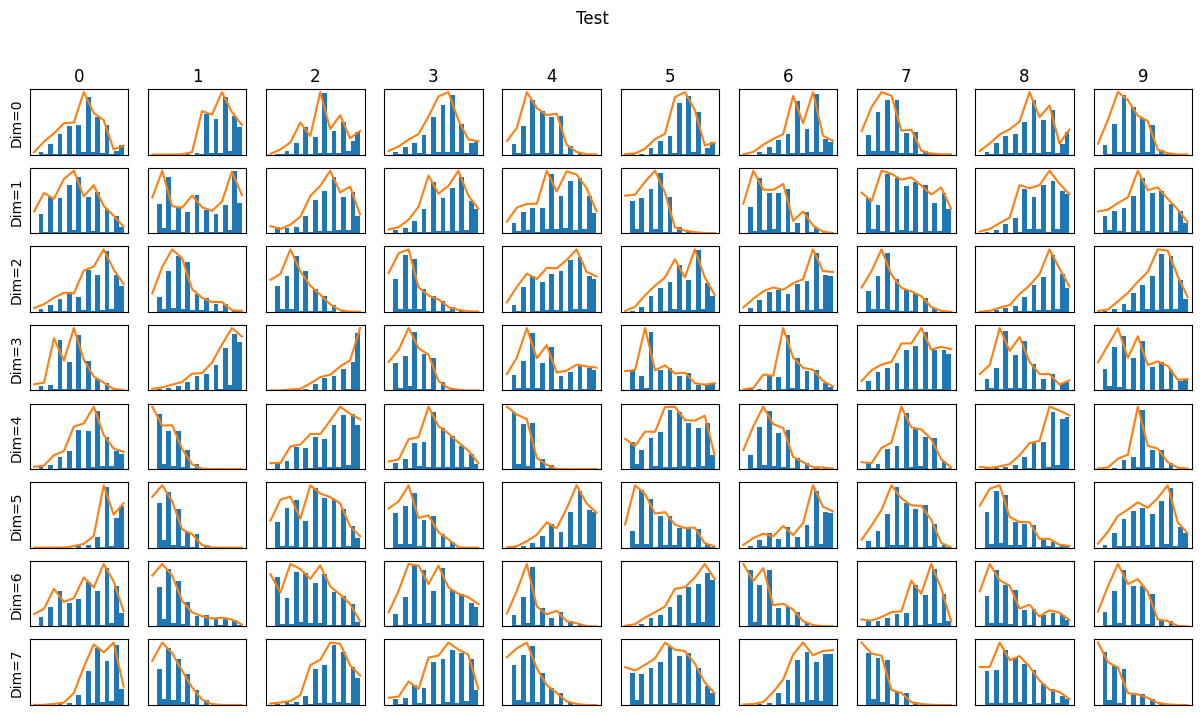

In [ ]:
# check z distribution
dim = 0
ny = 10




dy_dim = 1

nx = 8*dy_dim
plt.figure(figsize=[15, nx])

for dim in range(8):
    for i in range(10):
        plt.subplot(nx, ny, (dim*dy_dim)*ny+ i+1)
        plt.hist(encoded_out_dim[:, dim].detach().cpu()[targets_test==i], bins=np.linspace(0, 1, 20), density=True)
        plt.plot(np.linspace(0, 1, 10), factors_probability.detach().cpu()[targets_test==i].mean(0)[dim]*20)
        plt.gca().set_yticks([])
        plt.gca().set_xticks([])
        if dim == 0:
            plt.title(f"{i}")
        if i == 0:
            plt.ylabel(f"Dim={dim}")    
        
    # for i in range(10):
    #     plt.subplot(nx, ny, (dim*dy_dim + 1)*ny+ i+1)
    #     plt.hist(encoded_out_dim1[:, dim].detach().cpu()[targets_test==i], bins=20, density=True)
    #     plt.gca().set_yticks([])
    #     plt.gca().set_xticks([])
    #     # plt.title(f"{i}")
    
plt.suptitle(f"Test")

# for dim in range(8):
#     for i in range(10):
#         plt.subplot(nx, ny, i+1)
#         plt.hist(encoded_out_dim[:, dim].detach().cpu()[targets_test==i], bins=np.linspace(0, 1, 20), density=True, alpha=0.2)
#         plt.gca().set_yticks([])
#         plt.gca().set_xticks([])
#         if dim == 0:
#             plt.title(f"{i}")
#         if i == 0:
#             plt.ylabel(f"Dim={dim}")    
        
#     # for i in range(10):
#     #     plt.subplot(nx, ny, (dim*dy_dim + 1)*ny+ i+1)
#     #     plt.hist(encoded_out_dim1[:, dim].detach().cpu()[targets_test==i], bins=20, density=True)
#     #     plt.gca().set_yticks([])
#     #     plt.gca().set_xticks([])
#     #     # plt.title(f"{i}")
    
# plt.suptitle(f"Test")


In [ ]:
encoded_out_dim[:, 0][targets_test==2].detach().cpu().unique().shape

torch.Size([453])

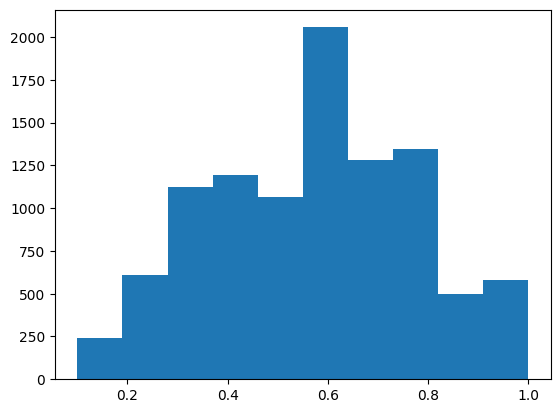

In [ ]:
plt.hist(encoded_out_dim[:, 0].detach().cpu(), bins=10)
plt.show()